<a href="https://colab.research.google.com/github/imlilalex/WincGlobalC02EmissionsAssignment/blob/main/Winc_Module_4_Assignment_Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

url = "https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions"
emissions = pd.read_html(url)[1]

emissions.columns = ("country", "1990", "2005", "2017", "2017 % world", "2017vs1990 %", "2017 co2/km2/yr", "2017 per capita", "2018 inc lucf", "2018 ex lucf")
emissions = emissions[emissions["country"].str.contains("World|European Union") == False]

emissions


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,country,1990,2005,2017,2017 % world,2017vs1990 %,2017 co2/km2/yr,2017 per capita,2018 inc lucf,2018 ex lucf
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Text(0.5, 1.0, 'Top 5 Countries with Biggest CO2 Emissions')

<Figure size 432x288 with 0 Axes>

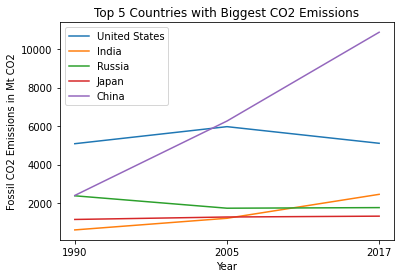

In [53]:
# Graph 1: CO2 of the bigger countries
# Biggest countries 2017 - Chine, US, India, Russia, Japan

big_countries = emissions.sort_values("2017", ascending = False).head(5)

# big_countries

fig = plt.figure()
fig, ax = plt.subplots()

plt.plot(big_countries.iloc[1, 1:4], label=big_countries.iloc[1, 0])
plt.plot(big_countries.iloc[2, 1:4], label=big_countries.iloc[2, 0])
plt.plot(big_countries.iloc[3, 1:4], label=big_countries.iloc[3, 0])
plt.plot(big_countries.iloc[4, 1:4], label=big_countries.iloc[4, 0])
plt.plot(big_countries.iloc[0, 1:4], label=big_countries.iloc[0, 0])

ax.legend()
ax.set_ylabel("Fossil CO2 Emissions in Mt CO2")
ax.set_xlabel("Year")
ax.set_title("Top 5 Countries with Biggest CO2 Emissions")

Text(0.5, 1.0, 'Best & Worst 3 Countries for Relative CO2 Change')

<Figure size 432x288 with 0 Axes>

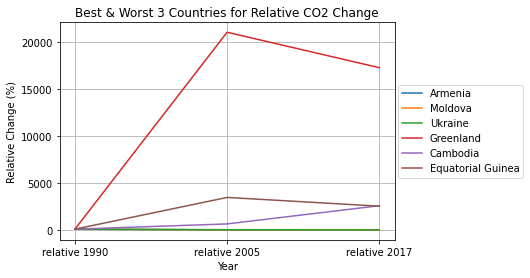

In [54]:
# Graph 2: worst and best changers
# Low = Armenia, Moldova, Ukraine
# High = Greenland, Cambodia, Equatorial Guinea

emissions['relative 1990'] = 100
emissions['relative 2005'] = (emissions.loc[:,'2005'] / emissions.loc[:,'1990']) * 100
emissions['relative 2017'] = (emissions.loc[:,'2017'] / emissions.loc[:,'1990']) * 100

relative_low = emissions.sort_values("relative 2017")
relative_high = emissions.sort_values("relative 2017", ascending = False)

fig1 = plt.figure()
fig1, ax = plt.subplots()

plt.plot(relative_low.iloc[0, 10:], label=relative_low.iloc[0, 0])
plt.plot(relative_low.iloc[1, 10:], label=relative_low.iloc[1, 0])
plt.plot(relative_low.iloc[2, 10:], label=relative_low.iloc[2, 0])
plt.plot(relative_high.iloc[0, 10:], label=relative_high.iloc[0, 0])
plt.plot(relative_high.iloc[1, 10:], label=relative_high.iloc[1, 0])
plt.plot(relative_high.iloc[2, 10:], label=relative_high.iloc[2, 0])

plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))

ax.grid(True)
plt.xlabel("Year")
plt.ylabel("Relative Change (%)")
ax.set_title("Best & Worst 3 Countries for Relative CO2 Change")

Text(0.5, 1.0, 'Best & Worst 3 Countries for Relative CO2 Change (Adjusted)')

<Figure size 432x288 with 0 Axes>

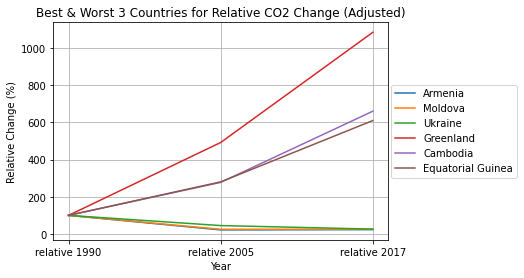

In [55]:
# Graph 2: worst and best changers >= 5 MT CO2
# High = Vietnam, Oman, Bangladesh
# Low = Same as above

over5_high = relative_high.iloc[:, 1] >=5
# relative_high[over5_high]
over5_low = relative_low.iloc[:, 1] >=5
# relative_low[over5_low]

fig2 = plt.figure()
fig2, ax = plt.subplots()

plt.plot(relative_low[over5_low].iloc[0, 10:], label=relative_low.iloc[0, 0])
plt.plot(relative_low[over5_low].iloc[1, 10:], label=relative_low.iloc[1, 0])
plt.plot(relative_low[over5_low].iloc[2, 10:], label=relative_low.iloc[2, 0])
plt.plot(relative_high[over5_high].iloc[0, 10:], label=relative_high.iloc[0, 0])
plt.plot(relative_high[over5_high].iloc[1, 10:], label=relative_high.iloc[1, 0])
plt.plot(relative_high[over5_high].iloc[2, 10:], label=relative_high.iloc[2, 0])

plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
ax.grid(True)
ax.set_xlabel("Year")
ax.set_ylabel("Relative Change (%)")
ax.set_title("Best & Worst 3 Countries for Relative CO2 Change (Adjusted)")